In [ ]:
!git clone https://github.com/sanghyun-son/EDSR-PyTorch /content/drive/MyDrive/EDSR-PyTorch

Cloning into '/content/drive/MyDrive/EDSR-PyTorch'...
remote: Enumerating objects: 806, done.
remote: Total 806 (delta 0), reused 0 (delta 0), pack-reused 806 (from 1)
Receiving objects: 100% (806/806), 63.09 MiB | 12.22 MiB/s, done.
Resolving deltas: 100% (516/516), done.


In [ ]:
!wget -P /content/drive/MyDrive/EDSR http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_valid_LR_bicubic_X2.zip

--2024-09-08 13:59:11--  http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_valid_LR_bicubic_X2.zip
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.178, 2001:67c:10ec:36c2::178
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_valid_LR_bicubic_X2.zip [following]
--2024-09-08 13:59:11--  https://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_valid_LR_bicubic_X2.zip
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 117763600 (112M) [application/zip]
Saving to: ‘/content/drive/MyDrive/EDSR/DIV2K_valid_LR_bicubic_X2.zip’

DIV2K_valid_LR_bicu 100%[===================>] 112.31M  17.9MB/s    in 7.4s    

2024-09-08 13:59:19 (15.2 MB/s) - ‘/content/drive/MyDrive/EDSR/DIV2K_valid_LR_bicubic_X2.zip’ saved [117763600/117763600]



In [ ]:
!pip install torch
!pip install numpy
!pip install scikit-image
!pip install imageio
!pip install matplotlib
!pip install tqdm
!pip install opencv-python

이미지 데이터셋 zip 파일 압축 풀기


In [ ]:
import zipfile
import os

# ZIP 파일 경로와 추출할 경로 설정
zip_file_path = '/content/drive/MyDrive/EDSR/DIV2K_train_LR_bicubic_X2.zip'
extract_path = '/content/drive/MyDrive/EDSR/DIV2K'

# 추출할 디렉토리 생성
os.makedirs(extract_path, exist_ok=True)

# ZIP 파일 열기 및 추출
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("ZIP 파일이 Google Drive에 추출되었습니다.")

ZIP 파일이 Google Drive에 추출되었습니다.


실행시키기

In [ ]:
%cd /content/drive/MyDrive/EDSR-PyTorch/src
!sh demo.sh

/content/drive/MyDrive/EDSR-PyTorch/src
Making model...
Preparing loss function:
1.000 * L1
/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:583: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  _warn_get_lr_called_within_step(self)
[Epoch 1]	Learning rate: 1.00e-4
[1600/15400]	[L1: 13.8872]	2.9+332.1s
[3200/15400]	[L1: 11.0484]	1.1+54.7s
[4800/15400]	[L1: 9.5727]	1.1+19.8s
[6400/15400]	[L1: 8.6731]	1.1+15.9s
[8000/15400]	[L1: 8.0273]	1.1+15.2s
[9600/15400]	[L1: 7.5579]	1.1+14.3s
[11200/15400]	[L1: 7.2183]	1.1+15.5s
[12800/15400]	[L1: 6.9337]	1.1+15.1s
[14400/15400]	[L1: 6.7103]	1.1+14.3s

Evaluation:
Data loader index: 0
Data loader object: <torch.utils.data.dataloader.DataLoader object at 0x7fc3777170d0>
Dataset length: 100
  0%|                                                   | 0/100 [00:00<?, ?it/s]LR: torch.Size([1, 3, 672, 1020]), HR: torch.Size([1, 3, 1344, 2040])
SR shape after model: torch.Size([1, 3, 1344

2배 가중치로 4배 학습시키기

In [ ]:
!python /content/drive/MyDrive/EDSR-PyTorch/src/main.py --model EDSR --scale 4 --save /content/drive/MyDrive/edsr_baseline_x4 --reset --pre_train /content/drive/MyDrive/EDSR-PyTorch/experiment/edsr_baseline_x2/model/model_best.pt

Making model...
Load the model from /content/drive/MyDrive/EDSR-PyTorch/experiment/edsr_baseline_x2/model/model_best.pt
/content/drive/MyDrive/EDSR-PyTorch/src/model/__init__.py:106: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub

Test my data

In [ ]:
!python /content/drive/MyDrive/EDSR-PyTorch/src/main.py --data_test Demo --dir_demo /content/drive/MyDrive/gaussianblur/deblur --scale 2 --pre_train /content/drive/MyDrive/EDSR-PyTorch/experiment/edsr_baseline_x2/model/model_best.pt --test_only --save_results --save /content/drive/MyDrive/edsr_results

Making model...
Load the model from /content/drive/MyDrive/EDSR-PyTorch/experiment/edsr_baseline_x2/model/model_best.pt
/content/drive/MyDrive/EDSR-PyTorch/src/model/__init__.py:106: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub

4배 가중치 파일로 test

###png로 학습했기 때문에 png로 변환하기

In [ ]:
!pip install Pillow

In [ ]:
from PIL import Image
import os

# 변환할 이미지가 있는 폴더 경로
input_dir = '/content/drive/MyDrive/lr_fin'  # JPG 이미지 경로
output_dir = '/content/drive/MyDrive/lr_fin/edsr'  # PNG 이미지 저장할 경로

# 출력 폴더가 없으면 생성
os.makedirs(output_dir, exist_ok=True)

# JPG 이미지를 PNG로 변환하는 함수
def convert_jpg_to_png(input_dir, output_dir):
    for filename in os.listdir(input_dir):
        if filename.endswith(".jpg") or filename.endswith(".jpeg"):
            img_path = os.path.join(input_dir, filename)
            img = Image.open(img_path)  # 이미지 열기

            # PNG 파일로 변환 후 저장 (확장자만 .png로 변경)
            png_filename = os.path.splitext(filename)[0] + '.png'
            output_path = os.path.join(output_dir, png_filename)
            img.save(output_path, 'PNG')
            print(f"Converted {filename} to {png_filename}")

# 변환 함수 호출
convert_jpg_to_png(input_dir, output_dir)


Converted 08신양항.jpg to 08신양항.png
Converted 08성산항.jpg to 08성산항.png
Converted KakaoTalk_20240904_151623719.jpg to KakaoTalk_20240904_151623719.png
Converted 08송난포구.jpg to 08송난포구.png
Converted 08종달리.jpg to 08종달리.png
Converted 08종달리해수욕장.jpg to 08종달리해수욕장.png
Converted 08신양섭지코지해변.jpg to 08신양섭지코지해변.png


###psnr 로그 파일 확인

In [ ]:
import torch

# PSNR 로그 파일 로드
psnr_log = torch.load('/content/drive/MyDrive/EDSR-PyTorch/experiment/edsr_baseline_x2/psnr_log.pt')

# PSNR 로그의 내용 출력
print(psnr_log)

tensor([[[32.1802]],

        [[32.3689]],

        [[32.7789]],

        [[33.1561]],

        [[33.3061]],

        [[33.1733]],

        [[33.4239]],

        [[33.5008]],

        [[33.5680]],

        [[33.5031]],

        [[33.6230]],

        [[33.6051]]])


<ipython-input-15-f0bc5fbb7a6f>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  psnr_log = torch.load('/content/drive/MyDrive/EDSR-PyTorch/experiment/edsr_baseline_x2/psnr_

###이미지 비교해보기

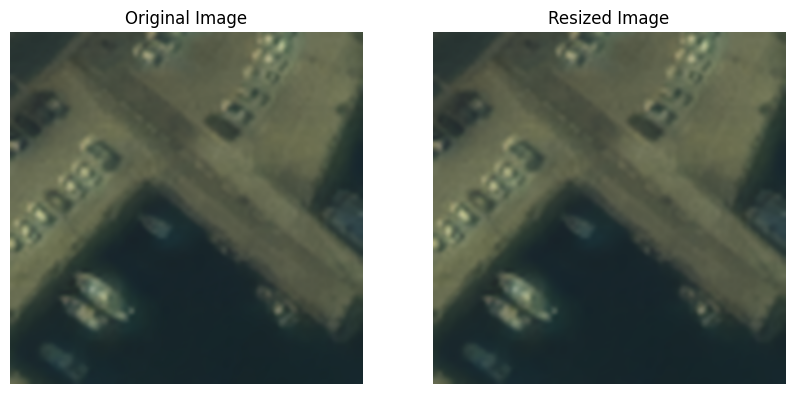

In [ ]:
import cv2
import matplotlib.pyplot as plt

def resize_image_and_show_comparison(image_path, new_size):
    # Read the original image
    img = cv2.imread(image_path)
    # Convert BGR to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Resize the image
    img_resized = cv2.resize(img_rgb, new_size, interpolation=cv2.INTER_AREA)

    # Create a figure to display the images
    plt.figure(figsize=(10, 5))

    # Display original image
    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title('Original Image')
    plt.axis('off')

    # Display resized image
    plt.subplot(1, 2, 2)
    plt.imshow(img_resized)
    plt.title('Resized Image')
    plt.axis('off')

    # Show the plot
    plt.show()


def resize_image_and_save(image_path, output_path, new_size):
    # Read the original image
    img = cv2.imread(image_path)
    # Convert BGR to RGB for display purposes (if needed)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Resize the image
    img_resized = cv2.resize(img_rgb, new_size, interpolation=cv2.INTER_AREA)

    # Save the resized image
    cv2.imwrite(output_path, cv2.cvtColor(img_resized, cv2.COLOR_RGB2BGR))

# Example usage
resize_image_and_save('/content/drive/MyDrive/edsr_results/results-Demo/08종달리_denoise_x2_SR.png', '/content/drive/MyDrive/lr_fin/edsr_resize/08종달리_denoise_x2_SR_resize.png', (640, 640))

# Example usage
resize_image_and_show_comparison('/content/drive/MyDrive/edsr_results/results-Demo/08종달리_denoise_x2_SR.png', (640, 640))


###cv2 gaussianblur 사용하기

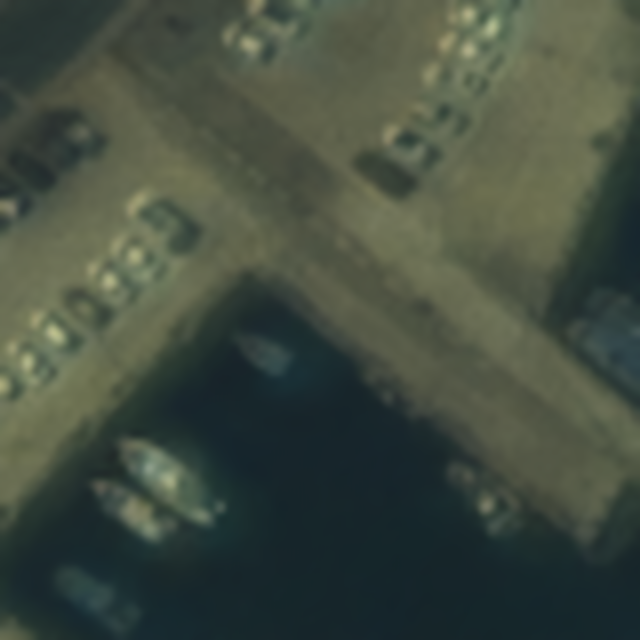

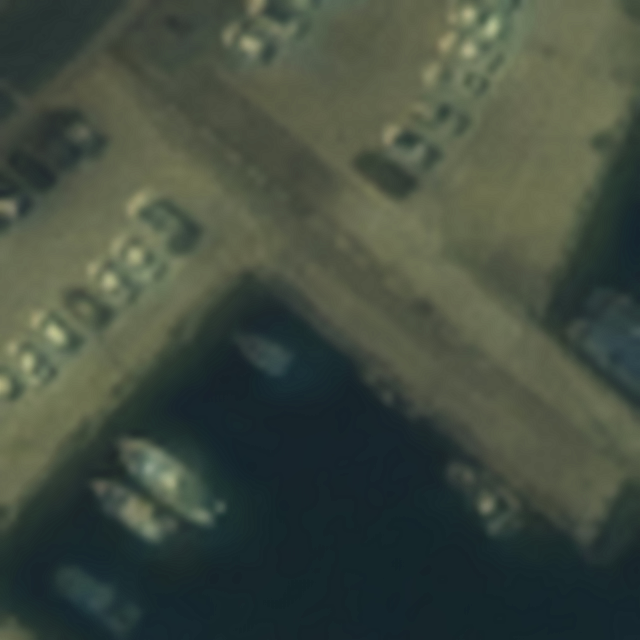

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread("/content/drive/MyDrive/NAFNet_results/denoise/08종달리_denoise.png")

img_ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)

img_f = img_ycrcb[:, :, 0].astype(np.float32)

img_blr = cv2.GaussianBlur(img_f, (0, 0), 1.0)

img_ycrcb[:, :, 0] = np.clip(2.0*img_f - img_blr, 0, 255).astype(np.uint8)

dst = cv2.cvtColor(img_ycrcb, cv2.COLOR_YCrCb2BGR)

cv2_imshow(img)
cv2_imshow(dst)
cv2.waitKey()
cv2.destroyAllWindows()

가우시안 블러 이미지 저장하기

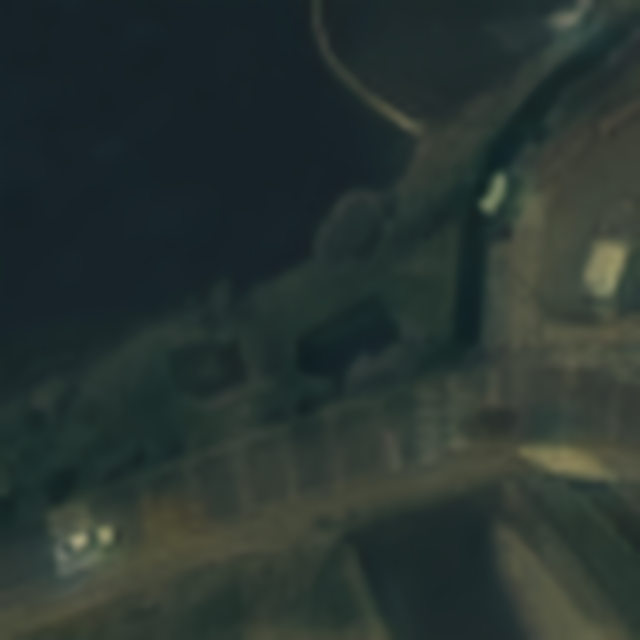

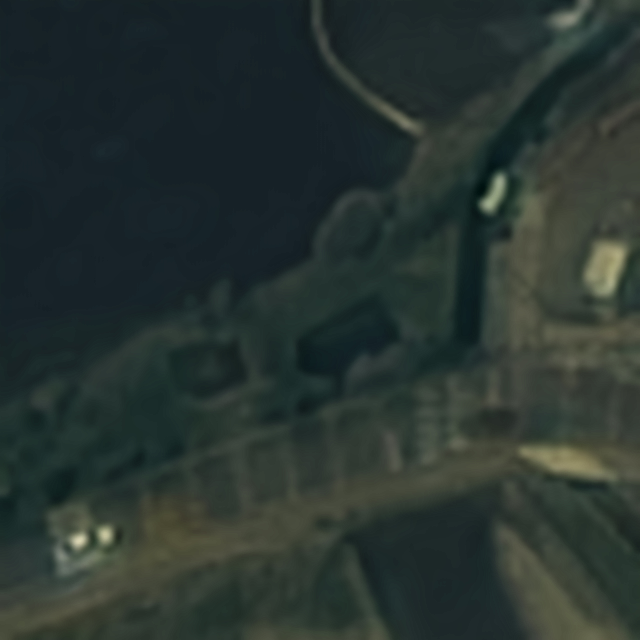

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# 이미지 읽기
img = cv2.imread("/content/drive/MyDrive/NAFNet_results/denoise/08종달리해수욕장_denoise.png")

# YCrCb 색상 공간으로 변환
img_ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)

# Y 채널을 float32로 변환
img_f = img_ycrcb[:, :, 0].astype(np.float32)

# 가우시안 블러 적용
img_blr = cv2.GaussianBlur(img_f, (0, 0), 8.0)

# 블러링 결과를 사용하여 Y 채널을 수정
img_ycrcb[:, :, 0] = np.clip(2.0 * img_f - img_blr, 0, 255).astype(np.uint8)

# BGR 색상 공간으로 다시 변환
dst = cv2.cvtColor(img_ycrcb, cv2.COLOR_YCrCb2BGR)

# 이미지 출력
cv2_imshow(img)
cv2_imshow(dst)

# 결과 이미지 저장
cv2.imwrite('/content/drive/MyDrive/gaussianblur/deblur/08종달리해수욕장_denoise_gassi.png', dst)

# 키 입력 대기 및 창 닫기 (Colab에서는 필요 없을 수 있음)
cv2.waitKey()
cv2.destroyAllWindows()


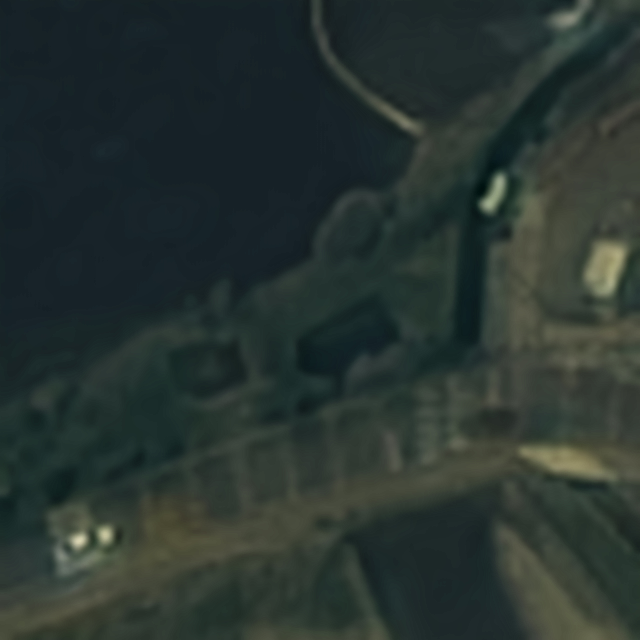

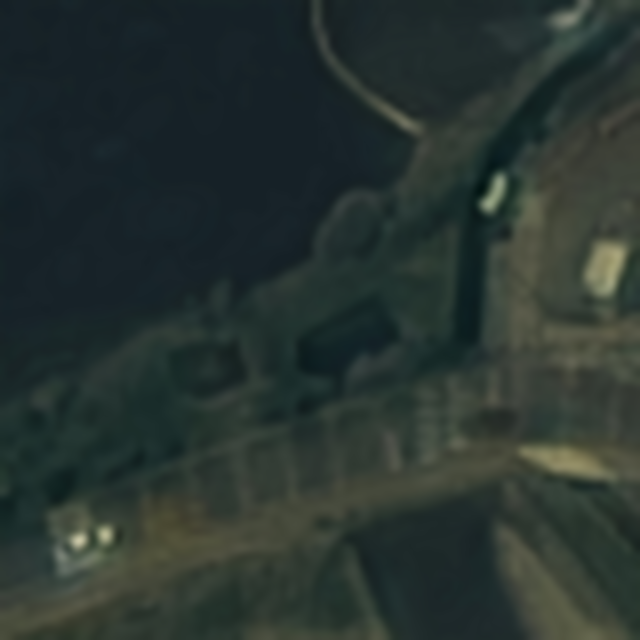

In [ ]:
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/drive/MyDrive/gaussianblur/deblur/08종달리해수욕장_denoise_gassi.png')

#cv2.blur(img, kernelSize)
dst = cv2.blur(img, (7,7))

cv2_imshow(img)
cv2_imshow(dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2 샤프닝 적용

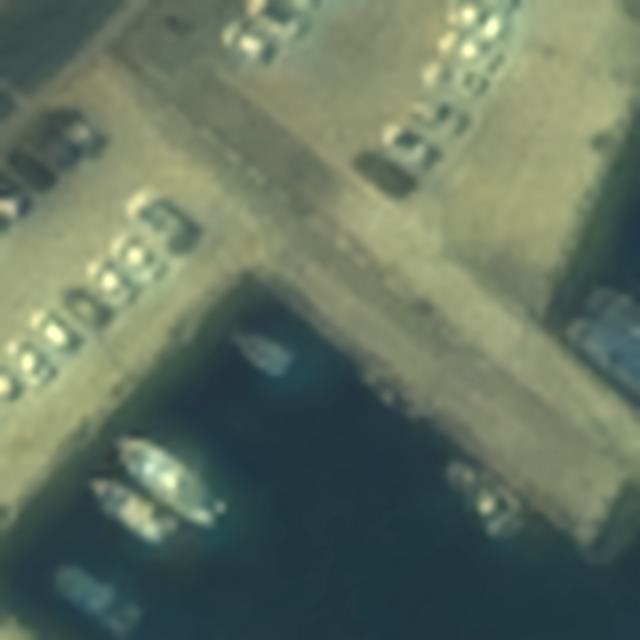

In [ ]:
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/NAFNet_results/denoise/08종달리_denoise.png')

# 블러 강도를 줄일수록 선명한 결과 ex) 5
blr = cv2.GaussianBlur(img, (5,5), 3)  #f'(x)
# 계수를 증가하여 강조 ex) 2.0
dst = np.clip(2.5*img - blr, 0, 255).astype('uint8')  #2*f(x) - f'(x)

cv2_imshow(dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
cv2.imwrite('', dst)

True

양방향 필터 - 노이즈를 줄이는데 사용되는 필터

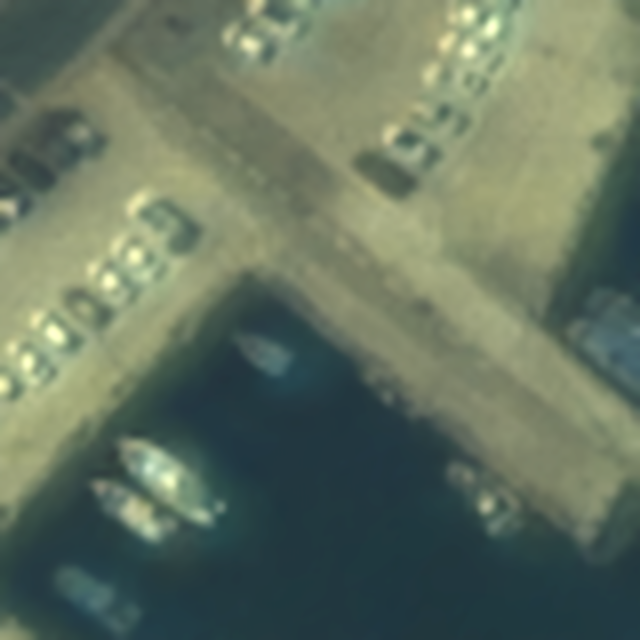

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/drive/MyDrive/gaussianblur/deblur/sharpened_image.png')
dst = cv2.bilateralFilter(img, 5, 100, 100)

cv2_imshow(dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
cv2.imwrite('/content/drive/MyDrive/gaussianblur/deblur/sharpened_filter_image2.png', dst)

True

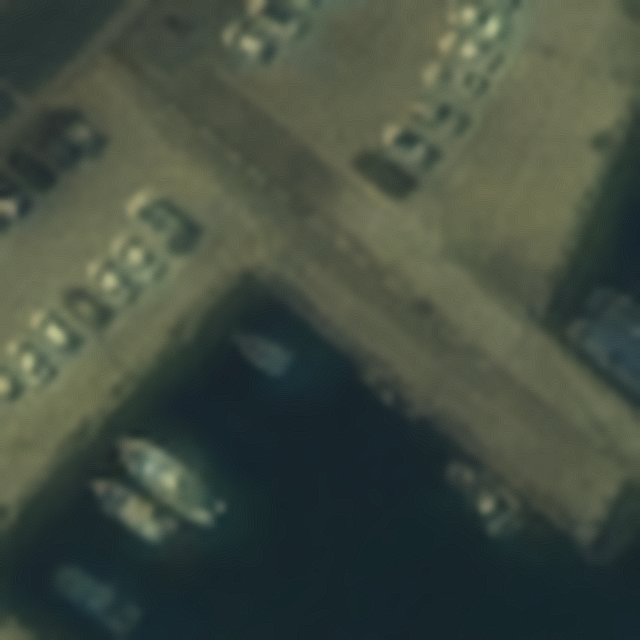

In [ ]:
# import cv2
# import numpy as np
# from google.colab.patches import cv2_imshow

# # 이미지 읽기
# img = cv2.imread('/content/drive/MyDrive/NAFNet_results/denoise/08종달리_denoise.png')

# # Bilateral filter로 노이즈를 줄인 후 샤프닝
# dst = cv2.bilateralFilter(img, 9, 100, 100)

# # 가우시안 블러 적용
# blurred = cv2.GaussianBlur(dst, (5, 5), 0)

# # 샤프닝 필터 정의
# sharpen_kernel = np.array([
#     [-1, -1, -1],
#     [-1,  9, -1],
#     [-1, -1, -1]
# ])

# # 샤프닝 적용
# sharpened = cv2.filter2D(blurred, -1, sharpen_kernel)

# # 결과 표시
# cv2_imshow(sharpened)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

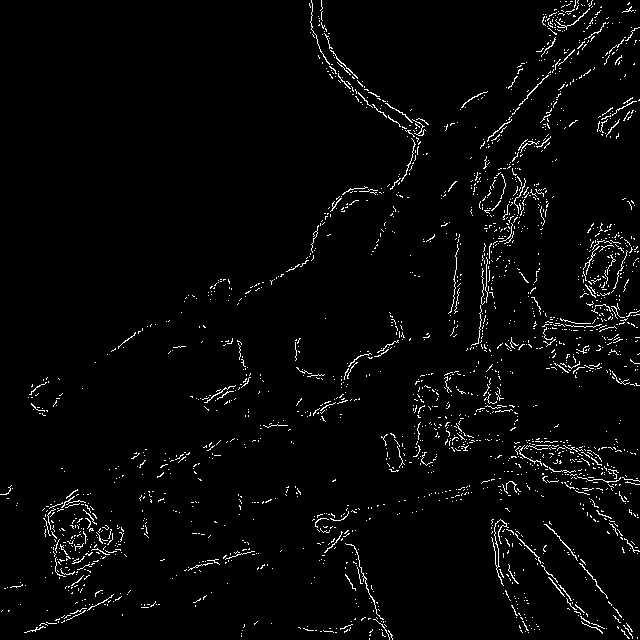

에지가 검출된 픽셀 좌표: [[  0 311]
 [  0 321]
 [  0 575]
 ...
 [639 369]
 [639 389]
 [639 392]]


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# 이미지 읽기 (그레이스케일로 읽기)
img = cv2.imread('/content/drive/MyDrive/gaussianblur/deblur/08종달리해수욕장_denoise_gassi.png', cv2.IMREAD_GRAYSCALE)

# Canny 에지 검출 적용
edges = cv2.Canny(img, 25, 50)

# 에지 이미지 보기
cv2_imshow(edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 에지가 검출된 픽셀 구하기
edge_pixels = np.argwhere(edges > 0)
print("에지가 검출된 픽셀 좌표:", edge_pixels)


In [ ]:
import cv2
import numpy as np

# 이미지 읽기 (그레이스케일)
img = cv2.imread('/content/drive/MyDrive/gaussianblur/deblur/08종달리해수욕장_denoise_gassi.png', cv2.IMREAD_GRAYSCALE)

# Canny 에지 검출 적용
edges = cv2.Canny(img, 20, 20)

# 에지 픽셀 좌표 구하기
edge_pixels = np.argwhere(edges > 0)
print("에지가 검출된 픽셀 좌표:", edge_pixels)


에지가 검출된 픽셀 좌표: [[  0 311]
 [  0 321]
 [  0 558]
 ...
 [639 529]
 [639 542]
 [639 632]]


In [ ]:
# 커널 크기 설정 (예: 5x5)
kernel_size = 5
sharpening_kernel = np.zeros((kernel_size, kernel_size), dtype=np.float32)

# 중앙 픽셀 값 설정
center = kernel_size // 2
sharpening_kernel[center, center] = 9  # 강조할 값

# 주변 픽셀 값 설정
for x, y in edge_pixels:
    if center-2 <= x < center+3 and center-2 <= y < center+3:  # 커널 범위 안에 있는지 확인
        sharpening_kernel[x - (center-2), y - (center-2)] = -1  # 주변 픽셀 값 설정

# 샤프닝 커널 정규화 (값의 합이 1이 되도록)
sharpening_kernel = sharpening_kernel / sharpening_kernel.sum()

print("샤프닝 커널:\n", sharpening_kernel)


샤프닝 커널:
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


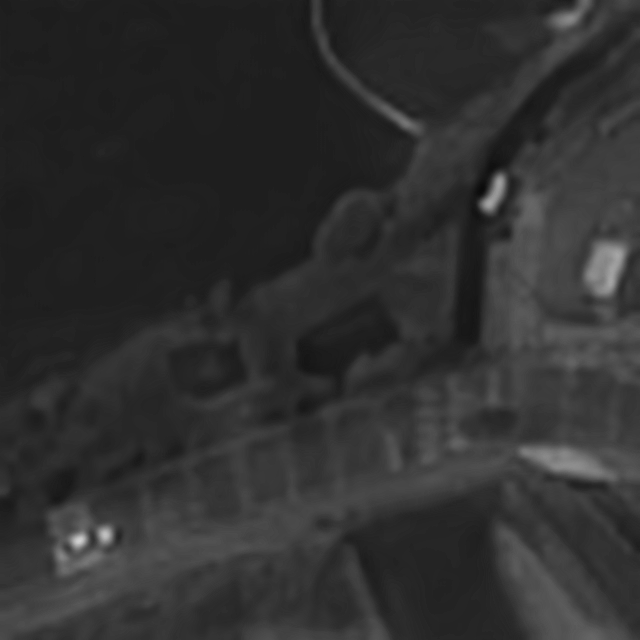

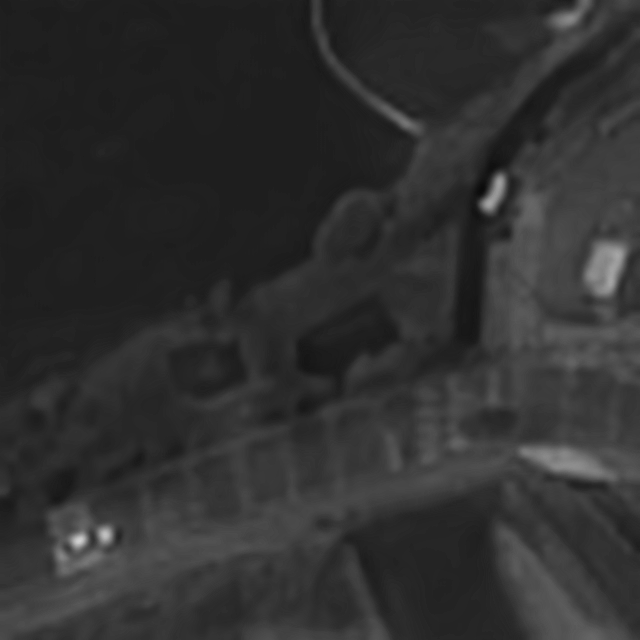

In [ ]:
# 샤프닝 커널 적용
sharpened_image = cv2.filter2D(img, -1, sharpening_kernel)

# 결과 보기
cv2_imshow(img)
cv2_imshow(sharpened_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

- 엣지의 강도를 반영하여 샤프닝 커널을 설정합니다.
- 에지 값이 20인 부분에 대해서만 샤프닝 효과를 적용하여 경계를 강조합니다.
- 커널의 중앙 값을 조정하고 주변 픽셀을 적절히 설정하여 더 뚜렷한 샤프닝 효과를 얻을 수 있습니다.

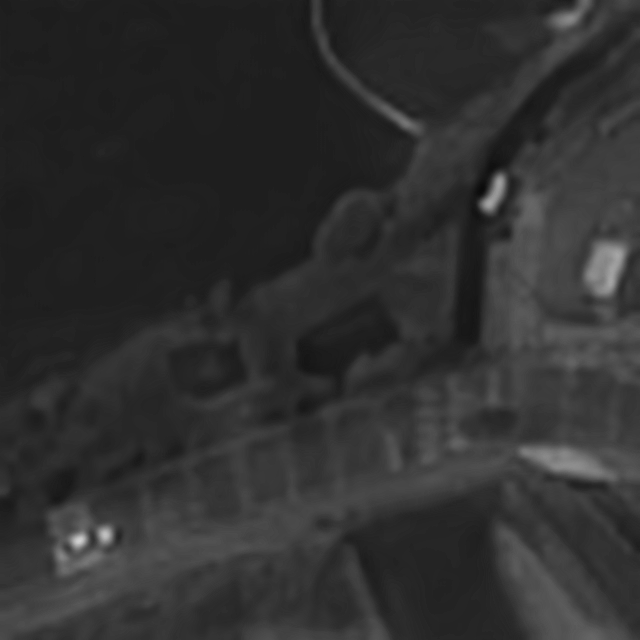

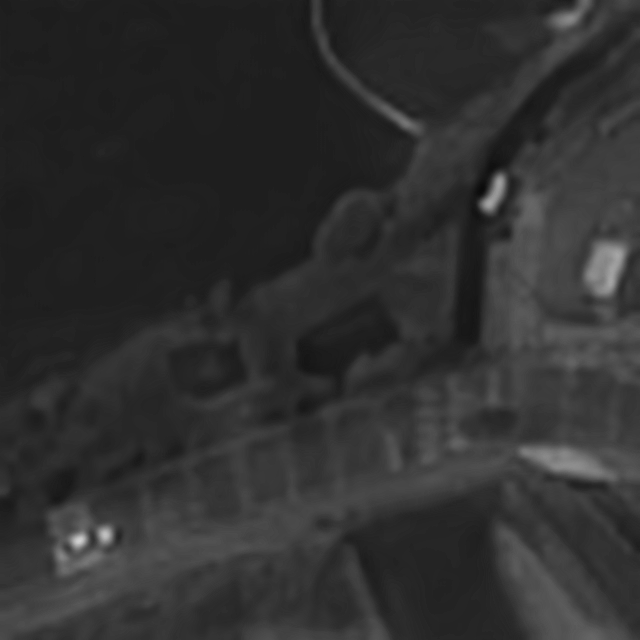

In [ ]:
import cv2
import numpy as np

# 이미지 읽기 (그레이스케일)
img = cv2.imread('/content/drive/MyDrive/gaussianblur/deblur/08종달리해수욕장_denoise_gassi.png', cv2.IMREAD_GRAYSCALE)

# Canny 에지 검출 적용
edges = cv2.Canny(img, 25, 25)

# 커널 크기 설정 (예: 5x5)
kernel_size = 5
sharpening_kernel = np.zeros((kernel_size, kernel_size), dtype=np.float32)

# 중앙 픽셀 값 설정
center = kernel_size // 2
sharpening_kernel[center, center] = 5  # 강조할 값

# 엣지 값이 20인 경우 주변 픽셀 값 설정
for y, x in np.argwhere(edges > 20):
    if 0 <= x < kernel_size and 0 <= y < kernel_size:
        sharpening_kernel[y, x] = -1  # 주변 픽셀 값 설정

# 샤프닝 커널 정규화
sharpening_kernel = sharpening_kernel / sharpening_kernel.sum()

# 샤프닝 커널 적용
sharpened_image = cv2.filter2D(img, -1, sharpening_kernel)

# 결과 값을 클리핑하여 0-255 범위로 조정
sharpened_image = np.clip(sharpened_image, 0, 255).astype(np.uint8)

# 결과 보기
cv2_imshow(img)
cv2_imshow(sharpened_image)
cv2.waitKey(0)
cv2.destroyAllWindows()